In [2]:
import pandas as pd
import json
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import string
import regex as re

טעינת הקובץ אל תוך דאטה פריים והסתכלות על הנתונים

In [3]:
data = pd.read_json("C:/Users/LENOVO/Desktop/data.json")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39772 entries, 0 to 39771
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39772 non-null  int64 
 1   cuisine      39772 non-null  object
 2   ingredients  39772 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


סוגי המטבחים השונים בדאטה

In [4]:
data['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

יצירת טבלה חדשה המראה את כמות המתכונים בכל סוג מטבח ואת כמות מצרכים הממוצעת לכל סוג מטבח

In [5]:
list = []
for ingredient in data['ingredients']: 
    list.append(len(ingredient))
data['ingredients_count'] = list
data_group = data.groupby('cuisine').agg({'id':'size','ingredients_count':'mean'}).rename(columns={'id':'count_id','ingredients_count':'mean_of_ingredients'}).reset_index(False)
data_group

,cuisine,count_id,mean_of_ingredients
0,brazilian,467,9.520343
1,british,804,9.708955
2,cajun_creole,1546,12.617076
3,chinese,2673,11.982791
4,filipino,755,10.000000
5,french,2646,9.817838
6,greek,1175,10.182128
7,indian,3003,12.705961
8,irish,667,9.299850
9,italian,7837,9.910042


ויזואליזציה של הנתונים

<AxesSubplot:ylabel='cuisine'>

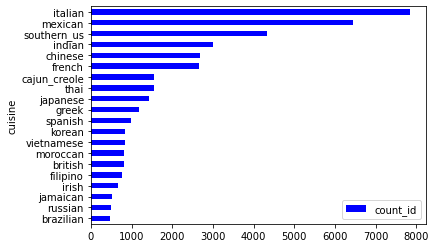

In [6]:
data_group.sort_values(by='count_id',ascending=True).plot.barh(x='cuisine', y='count_id',color='blue')


<AxesSubplot:ylabel='cuisine'>

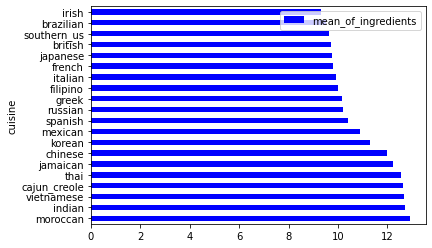

In [7]:
data_group.sort_values(by='mean_of_ingredients',ascending=False).plot.barh(x='cuisine', y='mean_of_ingredients',color='blue')


### ניקוי הדאטה

בדיקת תקינות המצרכים - על ידי הרצה של מצרכים הכוללים מספרים בשם

In [8]:
numbers = [str(i) for i in range(10)]
for ingredient in data['ingredients']:
    for i in ingredient:
        for letter in i:
            if letter in numbers:
                print(i)

1% low-fat milk
2% reduced-fat milk
2% reduced-fat milk
1% low-fat cottage cheese
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
(10 oz.) frozen chopped spinach, thawed and squeezed dry
(10 oz.) frozen chopped spinach, thawed and squeezed dry
2% reduced-fat milk
mexican style 4 cheese blend
1% low-fat milk
1% low-fat buttermilk
2% reduced-fat milk
1% low-fat milk
2% reduced-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
mexican style 4 cheese blend
2% reduced-fat milk
KNUDSEN 2% Milkfat Low Fat Cottage Cheese
1% low-fat milk
2% reduced-fat milk
1% low-fat milk
2% reduced-fat milk
mexican style 4 cheese blend
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat cottage cheese
1% low-fat milk
1% low-fat milk
mexican style 4 cheese blend
1% low-fat milk
2% reduced-fat milk
1% low-fat milk
1% low-fat milk
2% reduced-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low-fat milk
1% low

הסרת יחידות משקל ואחוזים (שומן וכו') מהמוצרים

In [9]:
list = []
all_lists = []
for ingredients in data['ingredients']:
    for ingredient in ingredients:
        if "oz." in ingredient:
            list.append(ingredient.split(")")[1])
        elif "%" in ingredient:
            if "%" == ingredient[1] or "%" == ingredient[2]:
                list.append(ingredient.split("%")[1])
        elif "lb." in ingredient:
             list.append(ingredient.split(".")[1])
        else:
            list.append(ingredient)
    all_lists.append(list)
    list = []
data['ingredients'] = all_lists

אחוז המתכונים עם לפחות 60 מוצרים ולכל היותר 2 מוצרים

In [10]:
list = []
list2 = []
to_drop = []
for i in range(0,len(data)):
    for j in data.iloc[i]['ingredients']:
        if len(j) >=60 :
            list.append(data.iloc[i]['id'])
            to_drop.append(i)
        elif len(j) <=2:
            list2.append(data.iloc[i]['id'])
            to_drop.append(i)
print(len(list)/len(data)*100,len(list2)/len(data)*100)

0.027657648597002912 0.010057326762546516


הסרת מתכונים אלו מהדאטה

In [11]:
data.drop(i, inplace = True)

חמשת המצרכים הנפוצים ביותר בכל סוג מטבח 

In [12]:
Temporary_data = pd.read_json("C:/Users/LENOVO/Desktop/data.json")
dic = {}
for i in range(0,len(Temporary_data)):
    cuisine = Temporary_data.iloc[i]['cuisine']
    if Temporary_data.iloc[i]['cuisine'] not in dic:
        dic[cuisine] = Temporary_data.iloc[i]['ingredients']
    else:
        for ingredient in Temporary_data.iloc[i]['ingredients']:
            dic[cuisine].append(ingredient)

for ingredient in dic:
    print(ingredient)
    print(Counter(dic[ingredient]).most_common(5))

greek
[('salt', 572), ('olive oil', 504), ('dried oregano', 267), ('garlic cloves', 254), ('feta cheese crumbles', 252)]
southern_us
[('salt', 2290), ('butter', 1255), ('all-purpose flour', 1222), ('sugar', 1054), ('large eggs', 746)]
filipino
[('salt', 421), ('garlic', 325), ('water', 310), ('onions', 310), ('soy sauce', 251)]
indian
[('salt', 1934), ('onions', 1195), ('garam masala', 862), ('water', 820), ('ground turmeric', 728)]
jamaican
[('salt', 332), ('onions', 173), ('water', 153), ('garlic', 139), ('ground allspice', 128)]
spanish
[('salt', 460), ('olive oil', 387), ('garlic cloves', 290), ('extra-virgin olive oil', 255), ('onions', 253)]
italian
[('salt', 3454), ('olive oil', 3110), ('garlic cloves', 1619), ('grated parmesan cheese', 1580), ('garlic', 1470)]
mexican
[('salt', 2720), ('onions', 1493), ('ground cumin', 1346), ('garlic', 1317), ('olive oil', 1289)]
chinese
[('soy sauce', 1363), ('sesame oil', 915), ('salt', 907), ('corn starch', 906), ('sugar', 824)]
british
[('

הסרת המצרכים הנפוצים ביותר - מלח, בצל, שמן זית, שום, סוכר ומים

In [13]:
list = []
all_lists = []
for ingredients in data['ingredients']:
    for ingredient in ingredients:
        if ingredient == "salt" or ingredient == "onions" or ingredient == "olive oil" or ingredient ==  "garlic" or ingredient ==  "sugar" or ingredient == "water":
            continue
        else:
            list.append(ingredient)
    all_lists.append(list)
    list = []
data['ingredients'] = all_lists


### ניתוח הדאטה

חיפוש מוצרים המכילים את שם המטבח

In [14]:
for i in range(0,len(data)):
    for j in data.iloc[i]['ingredients']:
        if data.iloc[i]['cuisine'] in j:
            print ("cuisine:"+data.iloc[i]['cuisine'], "ingredients:"+j)

cuisine:italian ingredients:italian seasoning
cuisine:italian ingredients:zesty italian dressing
cuisine:thai ingredients:thai basil
cuisine:italian ingredients:italian seasoning
cuisine:italian ingredients:italian seasoning
cuisine:chinese ingredients:chinese rice wine
cuisine:chinese ingredients:chinese five-spice powder
cuisine:spanish ingredients:chorizo spanish
cuisine:chinese ingredients:chinese rice wine
cuisine:thai ingredients:thai green curry paste
cuisine:italian ingredients:italian sausage
cuisine:italian ingredients:italian seasoning
cuisine:chinese ingredients:chinese rice wine
cuisine:chinese ingredients:chinese cabbage
cuisine:italian ingredients:italian seasoning
cuisine:jamaican ingredients:jamaican jerk season
cuisine:mexican ingredients:crema mexicana
cuisine:chinese ingredients:chinese five-spice powder
cuisine:italian ingredients:italian seasoning mix
cuisine:thai ingredients:thai chile
cuisine:mexican ingredients:mexican chorizo
cuisine:chinese ingredients:chines

#### בדיקת מוצרים יחודיים בכל מטבח

רשימת המוצרים בכל מטבח

In [15]:
Temporary_data = pd.read_json("C:/Users/LENOVO/Desktop/data.json")
dic = {}
for i in range(0,len(Temporary_data)):
    if Temporary_data.iloc[i]['cuisine'] not in dic:
        dic[Temporary_data.iloc[i]['cuisine']] = Temporary_data.iloc[i]['ingredients']
    else:
        dic[Temporary_data.iloc[i]['cuisine']].extend(Temporary_data.iloc[i]['ingredients'])

תדירות המופעים של כל מוצר בכל מטבח

In [16]:
dic2 = {}
for cuisine in dic:
    for ingredient in dic[cuisine]:
        if ingredient not in dic2:
            dic2[ingredient] = [cuisine]
        else:
            dic2[ingredient].append(cuisine) 

for ingredient in dic2:            
    print("ingredient:",ingredient,"-",Counter(dic2[ingredient]))

ingredient: romaine lettuce - Counter({'mexican': 103, 'greek': 39, 'italian': 33, 'thai': 20, 'vietnamese': 17, 'chinese': 13, 'cajun_creole': 12, 'french': 12, 'southern_us': 8, 'korean': 5, 'spanish': 4, 'indian': 3, 'irish': 1})
ingredient: black olives - Counter({'mexican': 92, 'italian': 67, 'greek': 31, 'french': 21, 'moroccan': 8, 'spanish': 4, 'southern_us': 3, 'cajun_creole': 2, 'russian': 1})
ingredient: grape tomatoes - Counter({'italian': 98, 'mexican': 53, 'greek': 26, 'southern_us': 14, 'french': 13, 'spanish': 6, 'indian': 5, 'cajun_creole': 5, 'thai': 4, 'chinese': 2, 'filipino': 1, 'japanese': 1})
ingredient: garlic - Counter({'italian': 1470, 'mexican': 1317, 'chinese': 763, 'indian': 726, 'thai': 414, 'cajun_creole': 370, 'filipino': 325, 'korean': 303, 'southern_us': 259, 'vietnamese': 239, 'greek': 216, 'french': 214, 'japanese': 166, 'moroccan': 143, 'jamaican': 139, 'spanish': 128, 'brazilian': 82, 'irish': 51, 'british': 34, 'russian': 20})
ingredient: pepper -

### הכנת טבלה לקראת הרצת המודל בהמשך

רשימת המצרכים 

In [17]:
ingredients = data.ingredients.explode().dropna()
ingredients

0                              romaine lettuce
0                                 black olives
0                               grape tomatoes
0                                       pepper
0                                 purple onion
                         ...                  
39770                     toasted sesame seeds
39770    store bought low sodium chicken stock
39770                              baking soda
39770                            Shaoxing wine
39770                                      oil
Name: ingredients, Length: 372997, dtype: object

חלוקת המצרכים לעמודות וצירוף לטבלת הנתונים המקורית

כאשר התא שווה 1, המצרך נמצא במתכון זה ו0 אם לא נמצא

In [34]:
data_model = data.join(pd.crosstab(ingredients.index, ingredients))
data_model

MemoryError: Unable to allocate 1.99 GiB for an array with shape (39771, 6702) and data type float64

In [ ]:
data_model.iloc[data_model.values==np.inf]
data_model.fillna(0,inplace=True)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

ייצוא טבלה לאקסל וטעינה מחדש

In [35]:
data_model.to_csv(r'C:\Users\LENOVO\Desktop\data.csv', index=False)

In [36]:
data_model = pd.read_csv("C:/Users/LENOVO/Desktop/data.csv")

In [37]:
warnings.filterwarnings('ignore')

חלוקה לסט אימון וסט מבחן

In [38]:
X = data_model.drop(columns = ["id","cuisine","ingredients","ingredients_count"] ,axis=1)
y = data_model.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0
    )
# endregion

confusion matrix function

In [58]:
def c_report(y_test,y_pred,X_test,model):
    cm = confusion_matrix(y_test, y_pred)
    print ('TP: %i, FP: %i, TN: %i, FN: %i' %(cm[1,1],cm[0,1],cm[0,0],cm[1,0]))
    print(classification_report(y_test, y_pred)) 
    probs = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, probs,multi_class='ovr')
    print('auc: %.3f' % auc)

Logistic Regression

In [45]:
#LogisticRegression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
scores = cross_val_score(lg, X_train,y_train, cv=cv, scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KeyboardInterrupt: 

In [ ]:
c_report(y_test,y_pred,X_test,lg)

Random Forest

In [ ]:
#random_forest
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestClassifier(n_estimators= 25, random_state=1).fit(X_train, y_train)
y_pred = rf.predict(X_test)
scores = cross_val_score(rf, X_train,y_train, cv=cv , scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    

In [ ]:
c_report(y_test,y_pred,X_test,rf)

גרף ROC
השוואה בין שני המודלים

In [ ]:
lg_roc_auc = roc_auc_score(y_test,lg.predict(X_test))
rf_roc_auc = roc_auc_score(y_test,rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lg_roc_auc,color ='g')
plt.plot(fpr2, tpr2, label='Random Forest (area = %0.2f)' % rf_roc_auc, color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()